# Homework 2: Project Part 2

## **Group 7**

### *Names*: Afeni Laws, Evie Davalbhakta, Rommy Sierra, Nathan Jackson, and Marybeth Yonk

#### Introduction

In this code, we outline the general activity of a neuron using the *Leaky Integrate and Fire Model*. We annotate each line of code within the code itself (indicated by the # comments within the code), explaining what it means in the scope of the model. We also include the output of the code and explain what the output means in the scope of the model. Overall, the code is used to generate a simulation of how a leaky integrative firing neuron uses current input, responds via a change in membrane potential, reaches the threshold, elicits an action potential, hyperpolarizes, and returns to a resting state before firing again. In this example specifically, a constant current input over a long period results in regular, excitable spikes of the neuron.

**References**

*Below are some references and/or images that we used as reference in creating our LIF model*

Dutta, S., Kumar, V., Shukla, A. et al. Leaky Integrate and Fire Neuron by Charge-Discharge Dynamics in Floating-Body MOSFET. 
    Sci Rep 7, 8257 (2017). https://doi.org/10.1038/s41598-017-07418-y

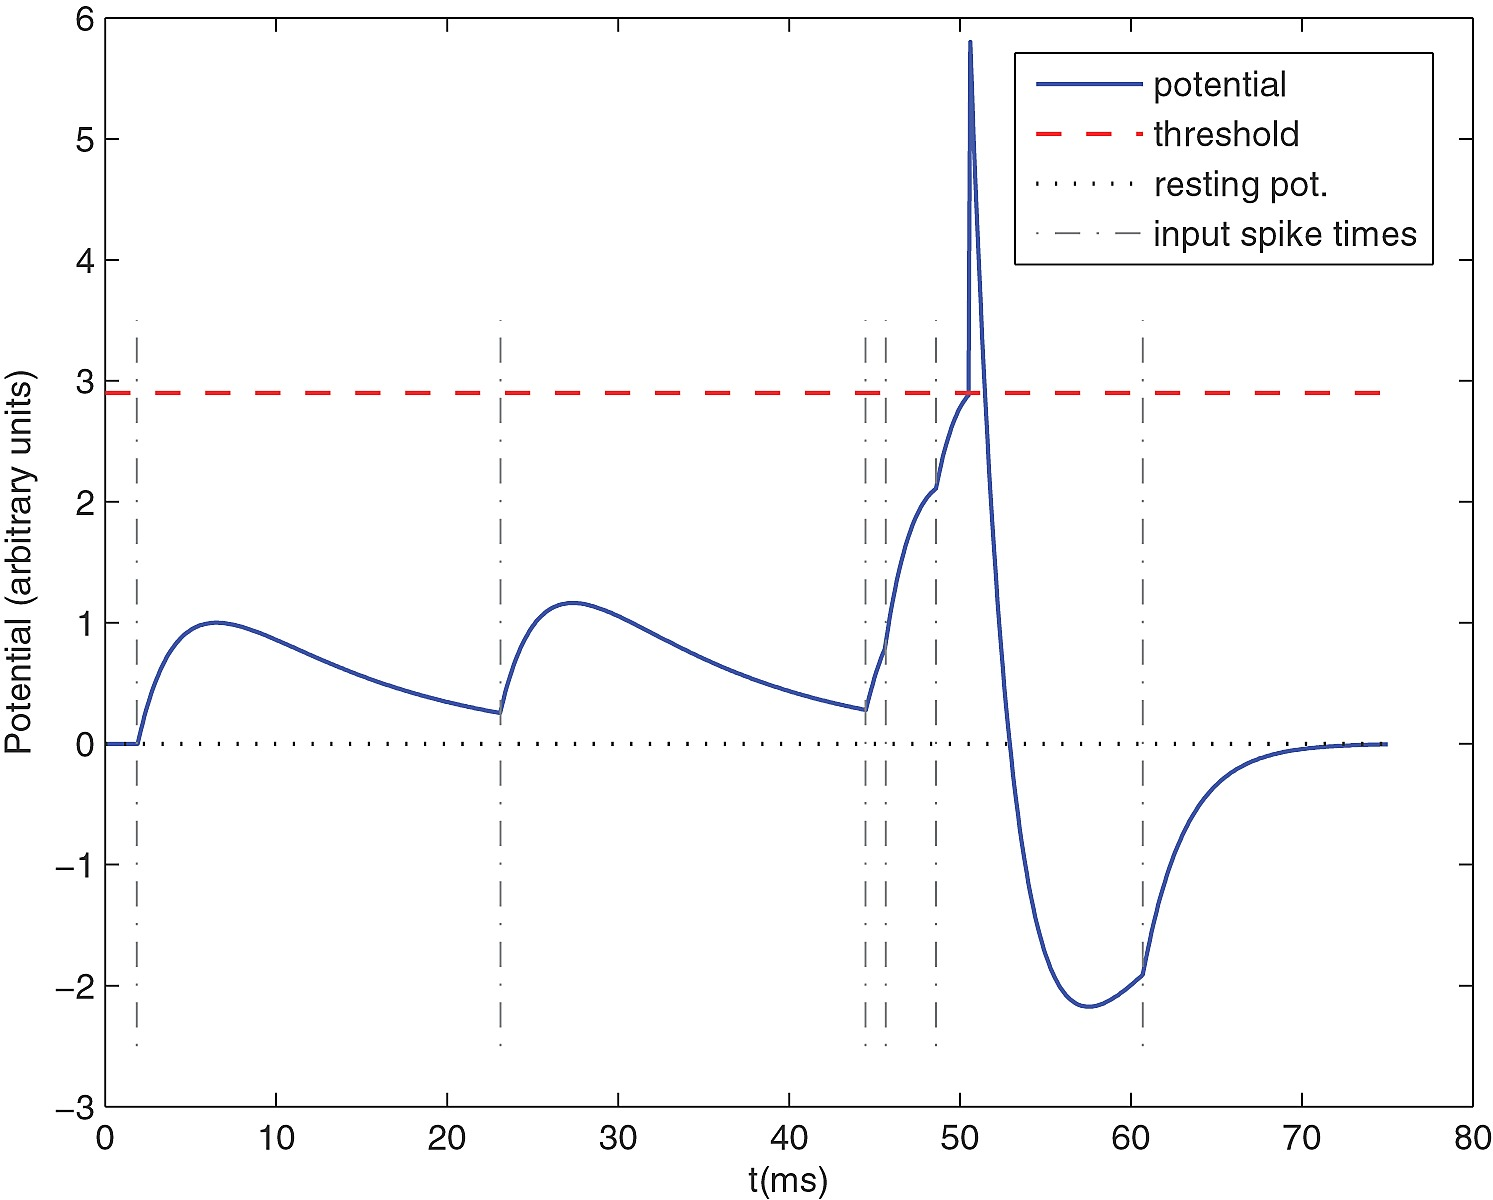

Masquelier, Timothée; Guyonneau, Rudy; J. Thorpe, Simon (2015). Leaky Integrate-and-Fire (LIF) neuron.. PLOS ONE. Figure. https://doi.org/10.1371/journal.pone.0001377.g003

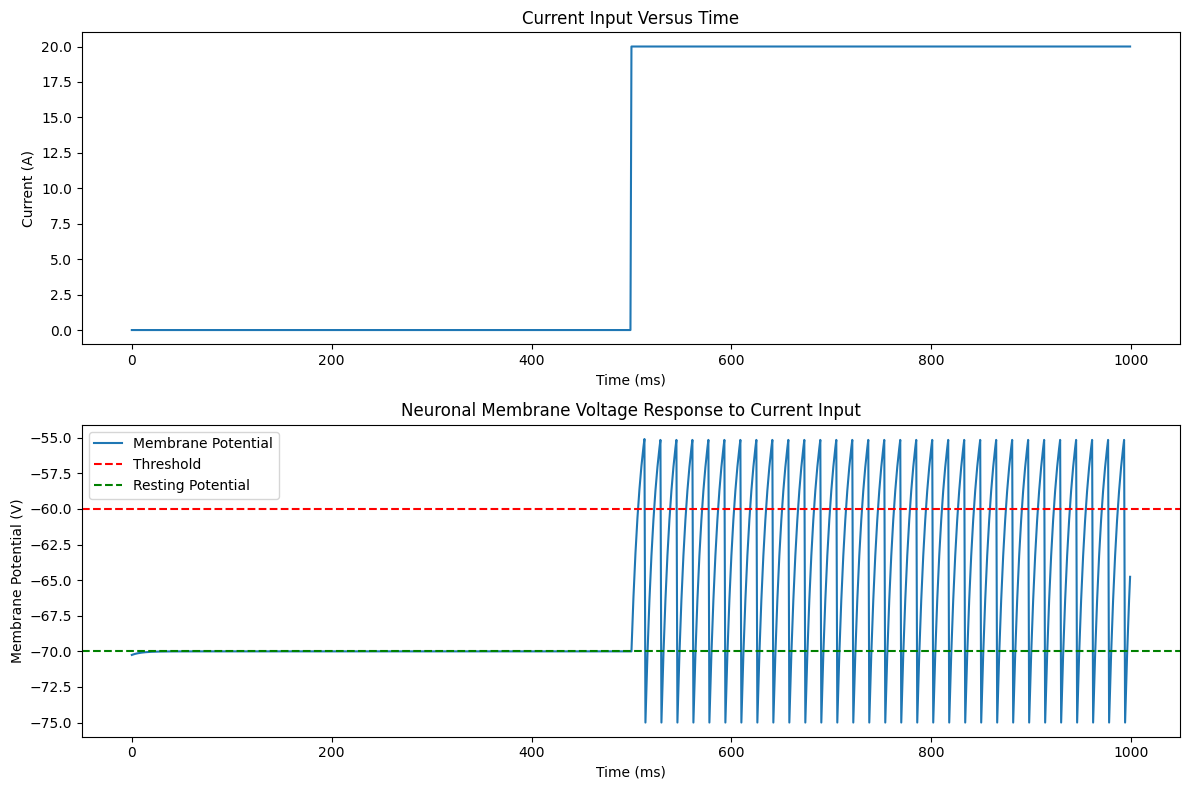

In [61]:
#This section of code is where the libraries "numpy" and "matplotlib" are imported in order for the code to have the proper resources to set up numerical operations and plot the spike data
import numpy as np
import matplotlib.pyplot as plt

#This section of the code is used to create a function that can be used to describe a LIF simulation
def lif_neuron(I, R=1, C=1, V_rest=-70, V_thresh=-55, V_reset=-75, dt=0.1, timesteps=1000):

    #This section of code is where all of the parameters are defined conceptually
    """
    Simulate a Leaky Integrate and Fire (LIF) neuron.

    Parameters:
    - I: Input current (constant or array)
    - R: Membrane resistance
    - C: Membrane capacitance
    - V_rest: Resting membrane potential
    - V_thresh: Threshold potential for firing
    - V_reset: Reset potential after firing
    - dt: Time step for numerical integration
    - timesteps: Number of simulation time steps

    Returns:
    - V: Membrane potential over time
    - spikes: Spike times
    """

    #This area of the code is necessary to set the initial variables of membrane potential and the times the spikes occur
    V = np.zeros(timesteps)
    spikes = []

    #This is a loop that goes through each point in time to determine the behavior of the neuron
    for t in range(-2, timesteps):
        #This is function that calculates the change in membrane potential according to the leaky integrate and fire model
        dV = (I[t - 1] - (V[t - 1] - V_rest) / R) / C * dt
        #This function is continuously updates the membrane potential at each point in time on the graph
        V[t] = V[t - 1] + dV

        #This is an "if" statement that sees if the calculated membrane voltage at the assessed time step is equivalent to the threshold. If it is, a spike is induced. If not, there is no spike.
        if V[t] >= V_thresh:
            V[t] = V_reset
            spikes.append(t)

    #This is where the spike times and the membrane potential for each point in time are returned
    return V, spikes

# This code is creating the input current and the change of current at 500 ms and says that the input current for the first 500 time steps is 0 and then 20A for the rest
I_step = np.concatenate([np.zeros(500), np.ones(500) * 20])

# This is calling the original LIF model function defined initially in the scope of the current input defined above
V_step, spikes_step = lif_neuron(I_step)

# All of the code below is relevant to plotting the data above
plt.figure(figsize=(12, 8))

#This is plot 1 relating to the input current plot
plt.subplot(2, 1, 1)
plt.plot(I_step, label='Input Current')
plt.title('Current Input Versus Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

#This is plot 2 relating to the actual spike simulation of the neuron. Lines for threshold and resting potential were added to show how the input current affects the firing of the neuron through change in membrane voltage
plt.subplot(2, 1, 2)
plt.plot(V_step, label='Membrane Potential')
plt.axhline(y=-60, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-70, color='g', linestyle='--', label='Resting Potential')
plt.title('Neuronal Membrane Voltage Response to Current Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')

#This is for the legend
plt.legend()
plt.tight_layout()
plt.show()

4. It appears that our LIF model doesn’t have a refractory period or any brief resting periods between the following action potential; the neuron spikes, becomes hyperpolarized, and returns to the resting potential state very quickly. This is most unlike a real biological neuron because without periodic pauses or refractory periods between action potentials it doesn’t allow the neuron a state or recovery between firing and therefore, it never fully returns to its resting potential. I would say this LIF model is missing periodic inhibitions and/or refractory period(s) and the quick state or resting potential followed by an immediate spike is what makes it dissimilar to a real neuron.

5. The most challenging part of this homework was editing the code that ChatGPT gave us to result in a more specific and desired graphical output. Overall, ChatGPT's code did work, but it was placing spikes in incorrect places and had incorrect labels on the axes. There was a good amount of debugging to be done in the code to give the best output.

6. This homework probably took us, collectively, 6 hours with all of the debugging and analysis of the code.